# Problem Identification
* **Objective**:
The objective of this project is to develop a classification model for detecting fake news. This model aims to accurately distinguish between real news and misinformation using advanced machine learning techniques. The primary goal is to enhance the reliability of information consumed by the public, thereby mitigating the impact of fake news on decision-making processes in daily life, politics, and elections.

* **Importance**:
Fake news poses a significant threat to informed decision-making, especially in democratic processes. The adverse effects of inaccurate news range from making people believe that Hillary Clinton had an alien baby to something even more ridiculous (Kumar S, et al, 2019). From where I live, Taiwan 🇹🇼, we have experienced a surge in fake news during elections, affecting public perception and voter behavior. Similarly, with the upcoming presidential election in the USA 🇺🇸at the end of 2024, the proliferation of fake news could influence electoral outcomes and undermine the integrity of democratic institutions.

* **Expectation**:
The classification models will leverage machine learning algorithms to analyze patterns and features in the news data, ensuring high accuracy in identifying fake news. The successful deployment of this model will be a step in combating the spread of misinformation and protecting the public from its harmful effects.

<div class="alert alert-block alert-info">
<b>Citation:</b> Kumar S, Asthana R, Upadhyay S, Upreti N, Akbar M (2019) Fake news detection using deep learning models: a novel approach. Trans Emerg Telecommun Technol 5:e3767
</div>

# Assumption & Hypothesis
Given the nature of text dataset, we anticipate that the logistic regression model may not yield the optimal performance for classifying news articles as fake or real. This assumption is grounded in two primary reasons. Firstly, the relationship between the words (features) and the news labels (fake or real) is likely to be non-linear. This means that the decision boundary, which separates fake news from real news, cannot be adequately captured by a simple linear model like logistic regression.

Secondly, text data, such as news content, inherently possesses high dimensionality owing to the extensive vocabulary size. As a result, the complexity of the classification task increases significantly. In such scenarios, models equipped with more sophisticated algorithms are expected to exhibit greater efficiency in handling classification tasks. Therefore, we hypothesize that a model employing a more complex algorithm would be better suited to effectively discern the nuances within the dataset and accurately classify news articles."

# Approach
In this project, we employed a comprehensive Natural Language Processing (NLP) pipeline to preprocess the text data and built several classification models to identify fake news. Below are the steps we followed:

**1. Data Preprocessing:**

* **Stop Words Removal:** Common stop words (e.g., "and", "the", "is") were removed to reduce noise and focus on the meaningful content of the text.
* **URL, Newline, and Tab Removal:** URLs, newline characters, and tabs were replaced with spaces to ensure clean and consistent text formatting.
* **Special Characters Removal:** Special characters and punctuation were removed to avoid interference in the tokenization process.
* **Tokenization:** The text was split into individual words (tokens), which is a crucial step for converting text into numerical features.

**2. Feature Extraction:**

* We used the `Term Frequency-Inverse Document Frequency` (TF-IDF) vectorizer to convert the cleaned text data into numerical features. This method helps to quantify the importance of words in a document relative to the entire corpus.

**3. Model Building:**

* **Logistic Regression:** A linear model that predicts the probability of a sample belonging to a particular class.
* **Decision Tree:** A non-linear model that splits the data into subsets based on feature values, creating a tree-like structure for decision making.
* **Random Forest:** An ensemble learning method that combines multiple decision trees to improve classification performance and reduce overfitting.
* **Support Vector Machine (SVM):** A model that finds the optimal separating hyperplane in a higher-dimensional space, particularly effective for non-linear relationships and high-dimensional data.

**4. Model Evaluation:**

* Each model was evaluated using metrics such as accuracy, F1 score, confusion matrix, and ROC AUC score to determine their performance in identifying fake news.
* Due to computational limitations, we focused on the most promising hyperparameter combinations for the SVM model. Despite these constraints, our SVM model with 
𝐶=0.1, 𝛾=1, and kernel = 'rbf' achieved an accuracy of approximately 90%.

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve


In [26]:
import re
from bs4 import BeautifulSoup

In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/edwinhsu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Acquisition & Analysis
The data for this project is sourced from Kaggle, which provides a well-structured dataset with approximately 72,000 data points. The dataset includes essential features for our analysis, such as news titles, news content, and labels indicating whether the news is fake or real. Additionally, the dataset is in relatively good condition, with only a few missing values (NA).
Further analysis including Exploratory Data Analysis (EDA), Data Cleaning, and Feature Engineering will be provided as follows.

In [5]:
df = pd.read_csv('/Users/edwinhsu/Assignment/Machine Learning & Predictive Analytics/WELFake_Dataset.csv')

In [6]:
df.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [7]:
df.shape

(72134, 4)

In [8]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [10]:
y = df.label
print(f'Ratio of real and fake news:')
y.value_counts(normalize=True).rename({1: 'real', 0: 'fake'})

Ratio of real and fake news:


label
real    0.514404
fake    0.485596
Name: proportion, dtype: float64

In [11]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [12]:
df.head(10)

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


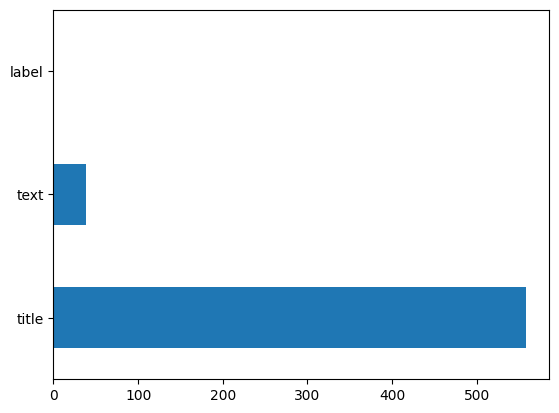

In [13]:
df.isnull().sum().plot(kind="barh")
plt.show()

In [14]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [15]:
df = df.dropna()

In [16]:
df.isna().sum()

title    0
text     0
label    0
dtype: int64

In [17]:
df.nunique()

title    62308
text     62200
label        2
dtype: int64

In [18]:
df["title&text"] = df["title"] + df["text"]
df["article len"] = df["title&text"].apply(lambda x: len(x) - x.count(" "))
df.head()

,title,text,label,title&text,article len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...,1342


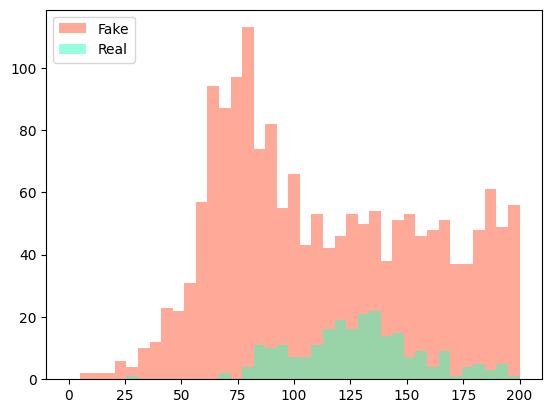

In [19]:
bins = np.linspace(0, 200, 40)

plt.hist(df[df["label"]== 1]["article len"], bins, alpha=0.5, label="Fake", color="#FF5733")
plt.hist(df[df["label"]== 0]["article len"], bins, alpha=0.5, label="Real", color="#33FFB8")
plt.legend(loc="upper left")
plt.show()

### ✍️ Note
Fake news articles tend to have a greater length of content compared to real news articles. This is likely because fake news often includes extensive details and arguments to persuade readers and make the narrative more believable.

Text(0.5, 1.0, 'Distribution of Fake/Real News')

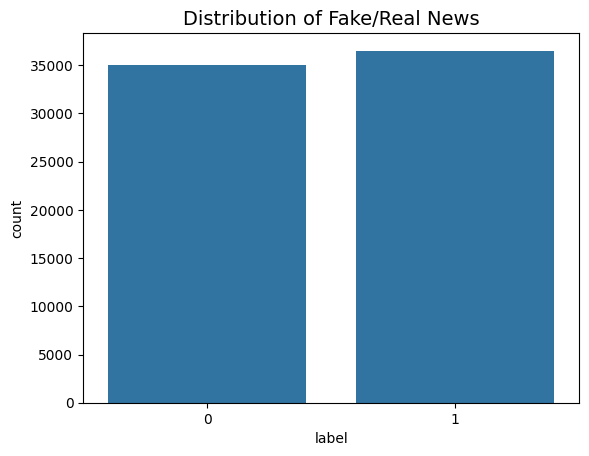

In [20]:
class_names = ['fake', 'real'] 
label_count = df.label.value_counts()
sns.barplot(x=label_count.index, y=label_count)
plt.title('Distribution of Fake/Real News',fontsize =14)

### ✍️ Note
The distribution of classes is balanced, as indicated by the nearly equal counts of fake news (label 0) and real news (label 1). Therefore, there is no need to address class imbalance issues.

### Text Cleaning

In [21]:
df.iloc[8, 1]

"FILE – In this Sept. 15, 2005 file photo, the marker that welcomes commuters to Cushing, Okla. is seen. (AP Photo/The Oklahoman, Matt Strasen, File)\nUnderscoring once again the dangers of America’s unreliable fossil fuel infrastructure, a significant U.S. oil pipeline has been shut down after a leak was reported Monday morning.\nEnterprise Products Partners said Monday it had shut its Seaway Crude Pipeline, a 400,000-barrel per day conduit that transports crude oil from Cushing, Oklahoma to Gulf coast refineries. The leak occurred Sunday night in an industrial area of Cushing. The company did not provide an estimate of the volume spilled, but said there was no danger to the public.\n“Seaway personnel continue to make progress in cleaning up the spill, substantially all of which has been contained in a retention pond at Enbridge’s facility,” the company said in a news release (pdf), explaining that the pipeline is a “50/50 joint venture” between Enterprise and Enbridge Inc. “Vacuum tr

In [22]:
# Function for cleaning text
def clean_text(text):
    # Initialize stopwords set
    stop_words = set(stopwords.words('english'))
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\.\S+', '', text)
    
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Remove remaining web remnants
    text = re.sub(r'http:', '', text)
    text = re.sub(r'https:', '', text)
    text = re.sub(r'www', '', text)
    
    # Replace newlines and tabs with a space
    text = re.sub(r'[\n\t]+', ' ', text)
    
    # Remove special characters, preserving intra-word dashes
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove stopwords
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Reconstruct text
    text = ' '.join(filtered_tokens)
    
    return text

In [28]:
from dask import dataframe as dd
import dask.multiprocessing
import re

# Convert your Pandas DataFrame to a Dask DataFrame
dask_df = dd.from_pandas(df, npartitions=1000)  # Adjust npartitions based on your machine

# Define your clean_text function here

# Apply the clean_text function using Dask's map_partitions
# This applies the function to each partition of the DataFrame
dask_df['cleaned text'] = dask_df.map_partitions(lambda df: df['text'].apply(clean_text), meta='str')

# Compute the result to get back a Pandas DataFrame
df_cleaned = dask_df.compute()

/opt/anaconda3/envs/notebook/lib/python3.11/site-packages/dask/dataframe/core.py:7366: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(
/var/folders/5m/4lhv4ytx7yj3s466mgvgfz4c0000gn/T/ipykernel_72969/1927256267.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
/var/folders/5m/4lhv4ytx7yj3s466mgvgfz4c0000gn/T/ipykernel_72969/1927256267.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
/var/folders/5m/4lhv4ytx7yj3s466mgvgfz4c0000gn/T

In [29]:
df_cleaned.head()

,title,text,label,title&text,article len,cleaned text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222,comment expected Barack Obama Members FYF911 F...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299,demonstrators gathered last night exercising c...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811,dozen politically active pastors came private ...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668,RS-28 Sarmat missile dubbed Satan 2 replace SS...
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...,1342,say one time someone sued Southern Poverty Law...


In [30]:
df_cleaned.iloc[8, 5]

'FILE Sept 15 2005 file photo marker welcomes commuters Cushing Okla seen AP PhotoThe Oklahoman Matt Strasen File Underscoring dangers Americas unreliable fossil fuel infrastructure significant US oil pipeline shut leak reported Monday morning Enterprise Products Partners said Monday shut Seaway Crude Pipeline 400000-barrel per day conduit transports crude oil Cushing Oklahoma Gulf coast refineries leak occurred Sunday night industrial area Cushing company provide estimate volume spilled said danger public Seaway personnel continue make progress cleaning spill substantially contained retention pond Enbridges facility company said news release pdf explaining pipeline 5050 joint venture Enterprise Enbridge Inc Vacuum trucks used recover crude oil return storage tanks on-site impacted segment legacy pipeline capacity 50000 barrels release added however actual amount crude oil released significantly less wont determined recovery efforts complete incident comes another pipeline rupture Penn

<div class="alert alert-block alert-success">
<b>The texts look clear and neat right now.</b>
</div>

### Apply tokenization on news content

In [31]:
import nltk
from nltk.stem import WordNetLemmatizer

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
# Upgrade NLTK
!pip install --upgrade nltk
# Ensure necessary NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/edwinhsu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/edwinhsu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/edwinhsu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/edwinhsu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
# Function for tokenization and lemmatization
def tokenize_and_lemmatize(text):
    # Tokenize words
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    tokens = [token.lower() for token in tokens if token.isalpha()]
    
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

In [36]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Convert your Pandas DataFrame to a Dask DataFrame
dask_df = dd.from_pandas(df_cleaned, npartitions=1000)  # Adjust npartitions based on your machine

# Apply the tokenization function using Dask's map_partitions
# This applies the function to each partition of the DataFrame
dask_df['text token'] = dask_df['cleaned text'].map_partitions(lambda df_cleaned: df_cleaned.apply(tokenize_and_lemmatize), meta='str')

# Compute the result to get back a Pandas DataFrame
df_cleaned = dask_df.compute()

/opt/anaconda3/envs/notebook/lib/python3.11/site-packages/dask/dataframe/core.py:7366: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


In [37]:
df_cleaned

,title,text,label,title&text,article len,cleaned text,text token
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222,comment expected Barack Obama Members FYF911 F...,"[comment, expected, barack, obama, member, fuk..."
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299,demonstrators gathered last night exercising c...,"[demonstrator, gathered, last, night, exercisi..."
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811,dozen politically active pastors came private ...,"[dozen, politically, active, pastor, came, pri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668,RS-28 Sarmat missile dubbed Satan 2 replace SS...,"[sarmat, missile, dubbed, satan, replace, fly,..."
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...,1342,say one time someone sued Southern Poverty Law...,"[say, one, time, someone, sued, southern, pove..."
...,...,...,...,...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,Russians steal research on Trump in hack of U....,4098,WASHINGTON Reuters - Hackers believed working ...,"[washington, reuters, hacker, believed, workin..."
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,WATCH: Giuliani Demands That Democrats Apolog...,3092,know fantasyland Republicans never questioned ...,"[know, fantasyland, republican, never, questio..."
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,Migrants Refuse To Leave Train At Refugee Camp...,2447,Migrants Refuse Leave Train Refugee Camp Hunga...,"[migrant, refuse, leave, train, refugee, camp,..."
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0,Trump tussle gives unpopular Mexican leader mu...,2868,MEXICO CITY Reuters - Donald Trumps combative ...,"[mexico, city, reuters, donald, trump, combati..."


### Apply cleaning technique on titles

In [38]:
from dask import dataframe as dd
import dask.multiprocessing
import re

# Convert your Pandas DataFrame to a Dask DataFrame
dask_df = dd.from_pandas(df_cleaned, npartitions=1000)  # Adjust npartitions based on your machine

# Define your clean_text function here

# Apply the clean_text function using Dask's map_partitions
# This applies the function to each partition of the DataFrame
dask_df['cleaned title'] = dask_df.map_partitions(lambda df_cleaned: df_cleaned['title'].apply(clean_text), meta='str')

# Compute the result to get back a Pandas DataFrame
df_cleaned = dask_df.compute()

/opt/anaconda3/envs/notebook/lib/python3.11/site-packages/dask/dataframe/core.py:7366: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(
/var/folders/5m/4lhv4ytx7yj3s466mgvgfz4c0000gn/T/ipykernel_72969/1927256267.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
/var/folders/5m/4lhv4ytx7yj3s466mgvgfz4c0000gn/T/ipykernel_72969/1927256267.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
/var/folders/5m/4lhv4ytx7yj3s466mgvgfz4c0000gn/T

### Apply tokenization  on titles

In [39]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Convert your Pandas DataFrame to a Dask DataFrame
dask_df = dd.from_pandas(df_cleaned, npartitions=1000)  # Adjust npartitions based on your machine

# Apply the tokenization function using Dask's map_partitions
# This applies the function to each partition of the DataFrame
dask_df['title token'] = dask_df['cleaned title'].map_partitions(lambda df_cleaned: df_cleaned.apply(tokenize_and_lemmatize), meta='str')

# Compute the result to get back a Pandas DataFrame
df_cleaned = dask_df.compute()

/opt/anaconda3/envs/notebook/lib/python3.11/site-packages/dask/dataframe/core.py:7366: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


In [40]:
df_cleaned

,title,text,label,title&text,article len,cleaned text,text token,cleaned title,title token
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222,comment expected Barack Obama Members FYF911 F...,"[comment, expected, barack, obama, member, fuk...",LAW ENFORCEMENT HIGH ALERT Following Threats C...,"[law, enforcement, high, alert, following, thr..."
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299,demonstrators gathered last night exercising c...,"[demonstrator, gathered, last, night, exercisi...",UNBELIEVABLE OBAMAS ATTORNEY GENERAL SAYS CHAR...,"[unbelievable, obamas, attorney, general, say,..."
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811,dozen politically active pastors came private ...,"[dozen, politically, active, pastor, came, pri...",Bobby Jindal raised Hindu uses story Christian...,"[bobby, jindal, raised, hindu, us, story, chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668,RS-28 Sarmat missile dubbed Satan 2 replace SS...,"[sarmat, missile, dubbed, satan, replace, fly,...",SATAN 2 Russia unvelis image terrifying new SU...,"[satan, russia, unvelis, image, terrifying, ne..."
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...,1342,say one time someone sued Southern Poverty Law...,"[say, one, time, someone, sued, southern, pove...",Time Christian Group Sues Amazon SPLC Designat...,"[time, christian, group, sue, amazon, splc, de..."
...,...,...,...,...,...,...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,Russians steal research on Trump in hack of U....,4098,WASHINGTON Reuters - Hackers believed working ...,"[washington, reuters, hacker, believed, workin...",Russians steal research Trump hack US Democrat...,"[russian, steal, research, trump, hack, u, dem..."
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,WATCH: Giuliani Demands That Democrats Apolog...,3092,know fantasyland Republicans never questioned ...,"[know, fantasyland, republican, never, questio...",WATCH Giuliani Demands Democrats Apologize Tru...,"[watch, giuliani, demand, democrat, apologize,..."
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,Migrants Refuse To Leave Train At Refugee Camp...,2447,Migrants Refuse Leave Train Refugee Camp Hunga...,"[migrant, refuse, leave, train, refugee, camp,...",Migrants Refuse Leave Train Refugee Camp Hungary,"[migrant, refuse, leave, train, refugee, camp,..."
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0,Trump tussle gives unpopular Mexican leader mu...,2868,MEXICO CITY Reuters - Donald Trumps combative ...,"[mexico, city, reuters, donald, trump, combati...",Trump tussle gives unpopular Mexican leader mu...,"[trump, tussle, give, unpopular, mexican, lead..."


In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

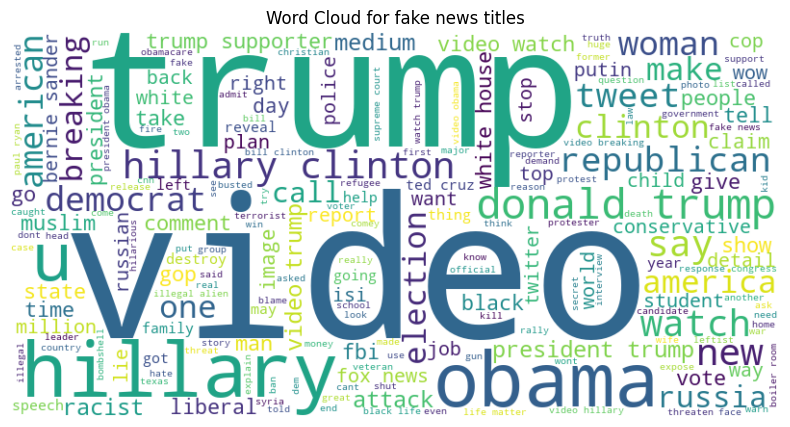

In [42]:
# Filter the DataFrame for a specific label (e.g., label == 1)
filtered_df = df_cleaned[df_cleaned['label'] == 1]

# Combine all the text in the 'title token' column
text = ' '.join([' '.join(tokens) if isinstance(tokens, list) else tokens for tokens in filtered_df['title token']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud for fake news titles')
plt.show()

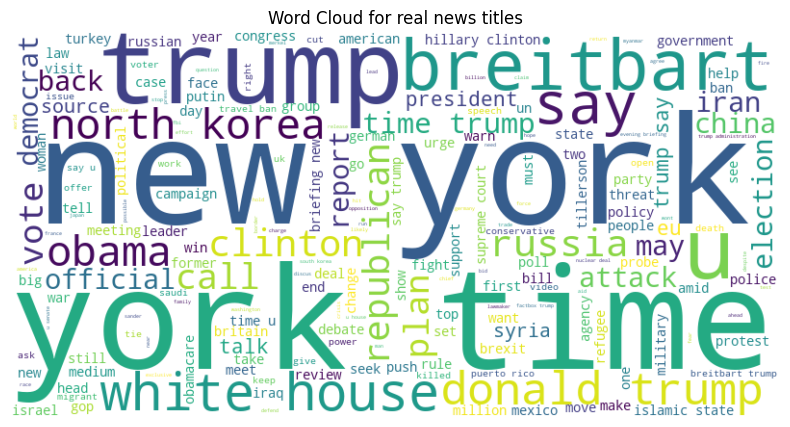

In [43]:
# Filter the DataFrame for a specific label (e.g., label == 0)
filtered_df = df_cleaned[df_cleaned['label'] == 0]

# Combine all the text in the 'title token' column
text = ' '.join([' '.join(tokens) if isinstance(tokens, list) else tokens for tokens in filtered_df['title token']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud for real news titles')
plt.show()

### ✍️ Note
The word cloud analysis reveals a predominant focus on political topics across both real and fake news. This observation resonates with research assertions suggesting that mature developed countries experience more pronounced issues with fake news, particularly within the political sphere.


<div class="alert alert-block alert-info">
<b>Citation:</b> Nagi, Kuldeep, New Social Media and Impact of Fake News on Society (2018). ICSSM Proceedings, July 2018, Chaing Mai, Thailand, pp. 77-96, Available at SSRN: https://ssrn.com/abstract=3258350
</div>

# Model Development & Evaluation

### ❓Can the news title be enough to predict whether the news is fake or not?

### Let's see how many words generally there in the titles

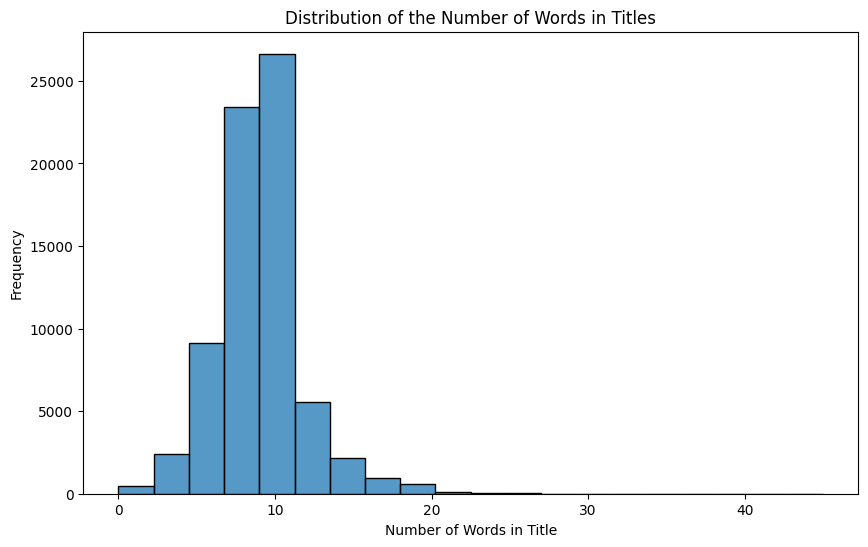

The maximum number of words in a title is 45


In [44]:
# Calculate the length of each list in the 'title tokens' column
df_cleaned['title_length'] = df_cleaned['title token'].apply(len)

# Plot the distribution of the title lengths
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['title_length'], bins=20, kde=False)
plt.title('Distribution of the Number of Words in Titles')
plt.xlabel('Number of Words in Title')
plt.ylabel('Frequency')
plt.show()

# Find the maximum length
max_length = df_cleaned['title_length'].max()

# Print the maximum number of words in a title
print(f'The maximum number of words in a title is {max_length}')

### ✍️ Note
On average, news titles consist of approximately 10 words. It's assumed that assessing the truthfulness of news solely based on these few words could be challenging. Consequently, classification models relying solely on titles may not achieve high accuracy levels.

### Apply train test split

In [45]:
X = df_cleaned['title token']  
y = df_cleaned['label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Accuracy: 0.898658093374336
Classification Report:
              precision    recall  f1-score   support

        Fake       0.90      0.88      0.89      6944
        Real       0.89      0.91      0.90      7364

    accuracy                           0.90     14308
   macro avg       0.90      0.90      0.90     14308
weighted avg       0.90      0.90      0.90     14308



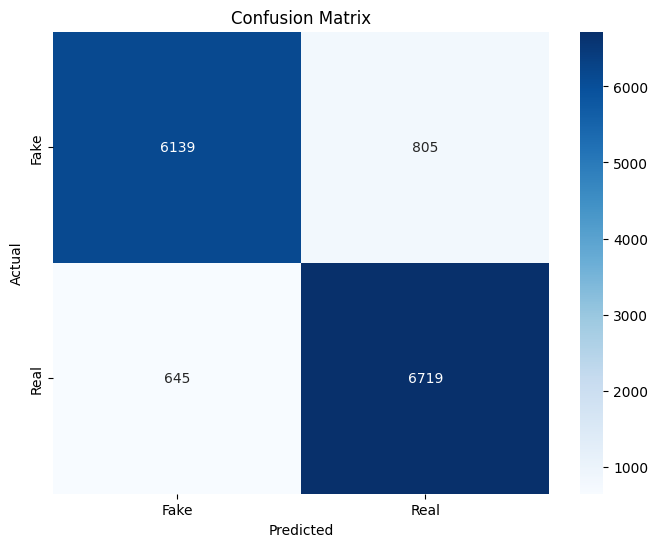

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

X_train = X_train.apply(lambda tokens: ' '.join(tokens))
X_test = X_test.apply(lambda tokens: ' '.join(tokens))

# Define a pipeline with TF-IDF vectorizer and Logistic Regression classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Using TF-IDF for feature extraction
    ('clf', LogisticRegression())  # Logistic Regression classifier
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Fake', 'Real'])

# Print classification report
print("Classification Report:")
print(class_report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### ✍️ Note
The classification model achieved an accuracy of approximately 89.87%. This report indicates a decent performance in classifying both fake and real news, with balanced precision, recall, and F1-scores for each class.

### ❓How about text (content)?

In [57]:
X = df_cleaned['text token']  
y = df_cleaned['label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Logistic Regression Accuracy: 0.948071009225608
Logistic Regression Classification Report:
              precision    recall  f1-score   support

        Fake       0.96      0.93      0.95      6944
        Real       0.94      0.96      0.95      7364

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308



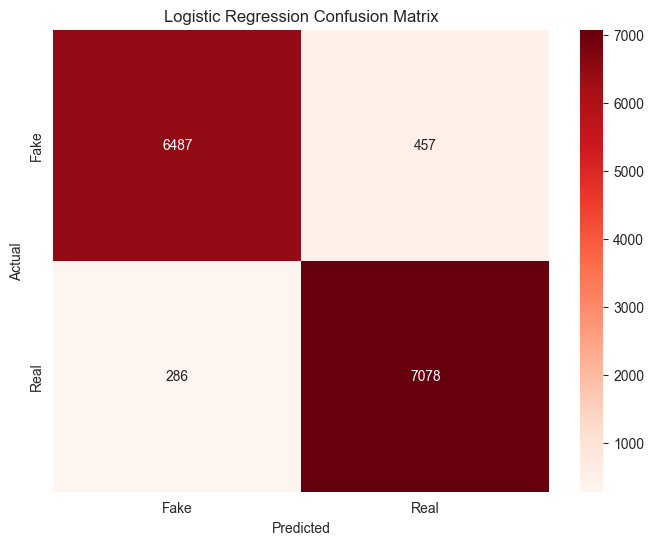

Logistic Regression F1 Score: 0.9501308812671991
Logistic Regression ROC AUC Score: 0.9887546480324009


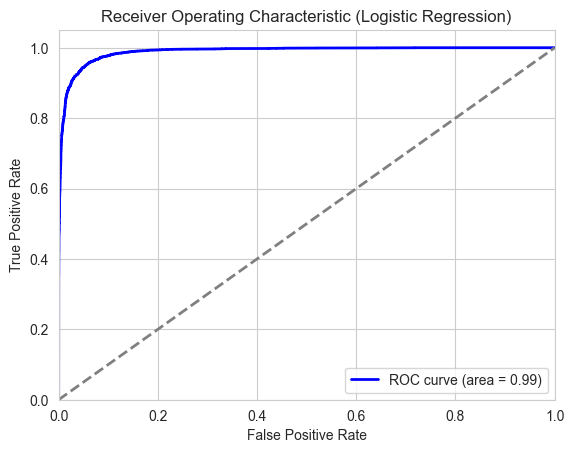

In [95]:
X = df_cleaned['text token']
y = df_cleaned['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Join the tokens back into strings
X_train = X_train.apply(lambda tokens: ' '.join(tokens))
X_test = X_test.apply(lambda tokens: ' '.join(tokens))

# Logistic Regression Model
model_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# Train the model
model_lr.fit(X_train, y_train)

# Predict on the test set
y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Fake', 'Real'])
print("Logistic Regression Classification Report:")
print(class_report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("Logistic Regression F1 Score:", f1)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("Logistic Regression ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()


### ✍️ Note
The classification model has significantly improved with an accuracy of approximately 94.81%. With increased precision, recall, and F1-scores for both classes, the results indicate a notable enhancement in the model's performance, especially in correctly identifying both fake and real news based on their content.

### ❓How about title + text?

In [49]:
from dask import dataframe as dd
import dask.multiprocessing
import re

# Convert your Pandas DataFrame to a Dask DataFrame
dask_df = dd.from_pandas(df_cleaned, npartitions=1000)  # Adjust npartitions based on your machine

# Define your clean_text function here

# Apply the clean_text function using Dask's map_partitions
# This applies the function to each partition of the DataFrame
dask_df['cleaned title&text'] = dask_df.map_partitions(lambda df_cleaned: df_cleaned['title&text'].apply(clean_text), meta='str')

# Compute the result to get back a Pandas DataFrame
df_cleaned = dask_df.compute()

/opt/anaconda3/envs/notebook/lib/python3.11/site-packages/dask/dataframe/core.py:7366: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(
/var/folders/5m/4lhv4ytx7yj3s466mgvgfz4c0000gn/T/ipykernel_72969/1927256267.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
/var/folders/5m/4lhv4ytx7yj3s466mgvgfz4c0000gn/T/ipykernel_72969/1927256267.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
/var/folders/5m/4lhv4ytx7yj3s466mgvgfz4c0000gn/T

In [50]:
# Convert your Pandas DataFrame to a Dask DataFrame
dask_df = dd.from_pandas(df_cleaned, npartitions=1000)  # Adjust npartitions based on your machine

# Apply the tokenization function using Dask's map_partitions
# This applies the function to each partition of the DataFrame
dask_df['title&text token'] = dask_df['cleaned title&text'].map_partitions(lambda df_cleaned: df_cleaned.apply(tokenize_and_lemmatize), meta='str')

# Compute the result to get back a Pandas DataFrame
df_cleaned = dask_df.compute()

/opt/anaconda3/envs/notebook/lib/python3.11/site-packages/dask/dataframe/core.py:7366: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


Accuracy: 0.9478613363153481
Classification Report:
              precision    recall  f1-score   support

        Fake       0.96      0.94      0.95      6944
        Real       0.94      0.96      0.95      7364

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308



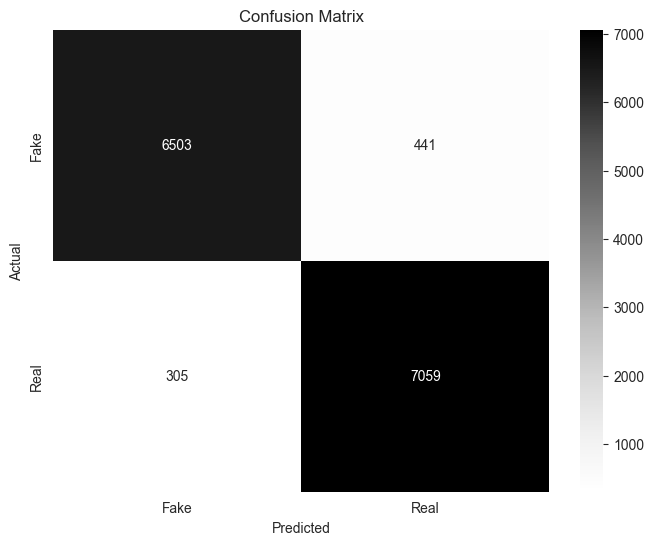

In [97]:
X = df_cleaned['title&text token']  
y = df_cleaned['label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

X_train = X_train.apply(lambda tokens: ' '.join(tokens))
X_test = X_test.apply(lambda tokens: ' '.join(tokens))

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Fake', 'Real'])

# Print classification report
print("Classification Report:")
print(class_report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', 
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### ✍️ Note
Combining titles and content results in an accuracy of 94.79%, which is very close to the accuracy achieved using content only. The performance metrics (precision, recall, F1-score) remain high and balanced, similar to the content-only model, suggesting that the content provides most of the discriminative power.

* **Content is Key:** The model performs significantly better when using the content of the news articles compared to using titles only. This indicates that the content contains more useful information for distinguishing between fake and real news.

* **Titles can be misleading:** They are often designed to attract attention and may not accurately reflect the full context or content of the article. Therefore, the audience should pay more attention to the content before making any decisions based on the information presented in news articles. 

### ✍️ Takeaway
While using the titles of news articles for fake news detection provides a reasonable level of accuracy, it is important to recognize the potential for misleading results. The model achieved an accuracy of 89.87% with titles alone, which is significantly lower than the 94.81% accuracy achieved using the content of the articles. This discrepancy indicates that titles alone may not contain sufficient information to accurately distinguish between fake and real news.
Moreover, titles are often designed to attract attention and may not accurately reflect the full context or content of the article. This can lead to misclassification, where legitimate articles with sensational titles are flagged as fake, or misleading titles of fake news are not identified correctly. Therefore, relying solely on titles for fake news detection can result in a higher likelihood of both false positives and false negatives.

### Let's try different models

### SVM Model

SVM Accuracy: 0.963307240704501
SVM Classification Report:
              precision    recall  f1-score   support

        Fake       0.97      0.96      0.96      6944
        Real       0.96      0.97      0.96      7364

    accuracy                           0.96     14308
   macro avg       0.96      0.96      0.96     14308
weighted avg       0.96      0.96      0.96     14308



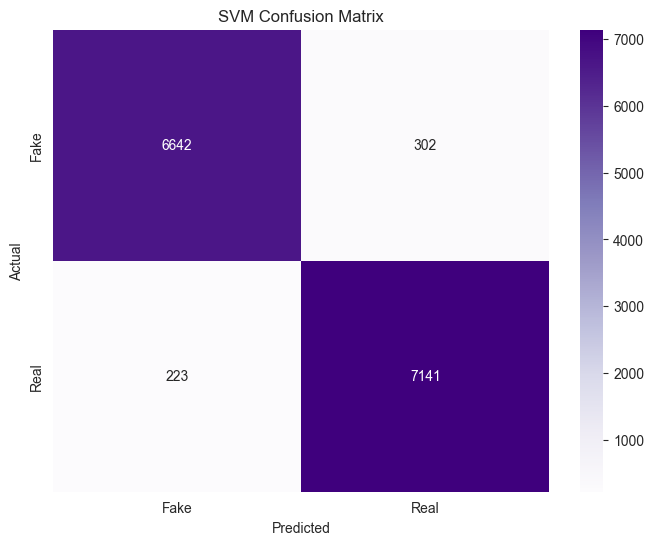

SVM F1 Score: 0.9645437968528399
SVM ROC AUC Score: 0.9931164904711425


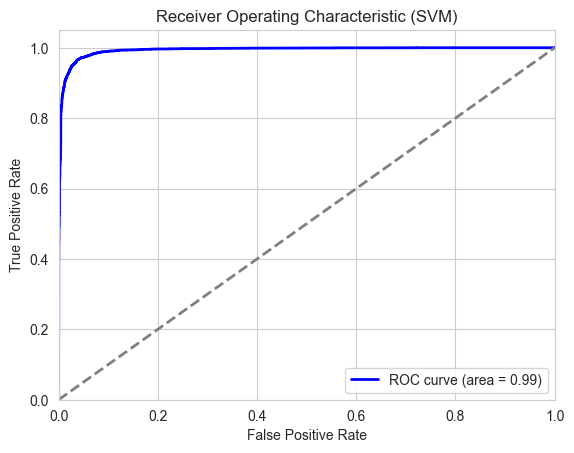

In [96]:
X = df_cleaned['text token']
y = df_cleaned['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Join the tokens back into strings
X_train = X_train.apply(lambda tokens: ' '.join(tokens))
X_test = X_test.apply(lambda tokens: ' '.join(tokens))

# Define a pipeline to transform the text data and then apply the classifier
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='linear', probability=True))
])

# Train SVM model
pipeline_svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = pipeline_svm.predict(X_test)
y_prob_svm = pipeline_svm.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Generate classification report
class_report_svm = classification_report(y_test, y_pred_svm, target_names=['Fake', 'Real'])
print("SVM Classification Report:")
print(class_report_svm)

# Calculate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Calculate F1 score
f1_svm = f1_score(y_test, y_pred_svm)
print("SVM F1 Score:", f1_svm)

# Calculate ROC AUC score
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
print("SVM ROC AUC Score:", roc_auc_svm)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_svm:0.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc='lower right')
plt.show()

### Decision Tree Model

Decision Tree Accuracy: 0.9216522225328487
Decision Tree Classification Report:
              precision    recall  f1-score   support

        Fake       0.93      0.90      0.92      6944
        Real       0.91      0.94      0.92      7364

    accuracy                           0.92     14308
   macro avg       0.92      0.92      0.92     14308
weighted avg       0.92      0.92      0.92     14308



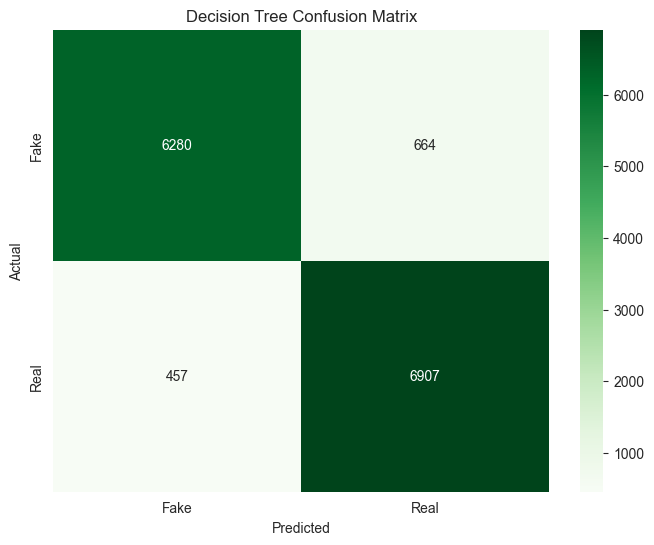

Decision Tree F1 Score: 0.9249414127887513
Decision Tree ROC AUC Score: 0.9201610967197502


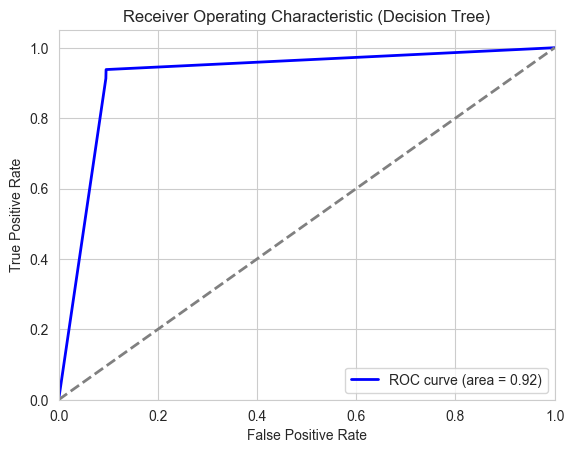

In [93]:
X = df_cleaned['text token']
y = df_cleaned['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Join the tokens back into strings
X_train = X_train.apply(lambda tokens: ' '.join(tokens))
X_test = X_test.apply(lambda tokens: ' '.join(tokens))

# Define a pipeline to transform the text data and then apply the classifier
pipeline_dt = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier())
])

# Train Decision Tree model
pipeline_dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = pipeline_dt.predict(X_test)
y_prob_dt = pipeline_dt.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Generate classification report
class_report_dt = classification_report(y_test, y_pred_dt, target_names=['Fake', 'Real'])
print("Decision Tree Classification Report:")
print(class_report_dt)

# Calculate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Calculate F1 score
f1_dt = f1_score(y_test, y_pred_dt)
print("Decision Tree F1 Score:", f1_dt)

# Calculate ROC AUC score
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
print("Decision Tree ROC AUC Score:", roc_auc_dt)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_dt:0.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc='lower right')
plt.show()

### Random Forest Model

Random Forest Accuracy: 0.9350013978194017
Random Forest Classification Report:
              precision    recall  f1-score   support

        Fake       0.94      0.92      0.93      6944
        Real       0.93      0.95      0.94      7364

    accuracy                           0.94     14308
   macro avg       0.94      0.93      0.93     14308
weighted avg       0.94      0.94      0.93     14308



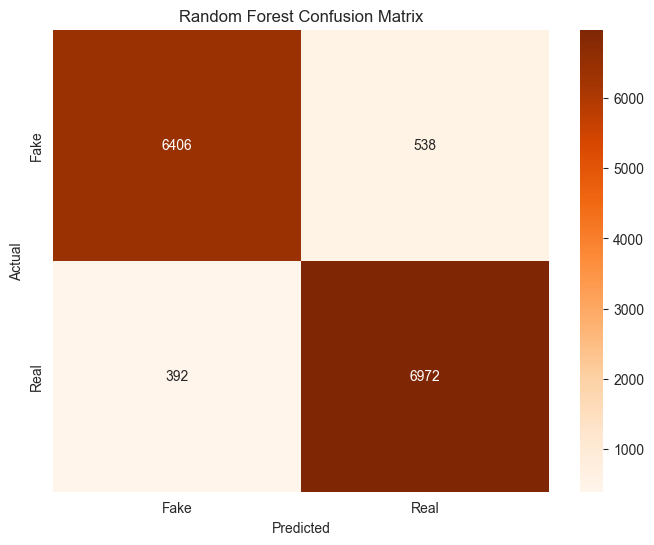

Random Forest F1 Score: 0.9374747882210569
Random Forest ROC AUC Score: 0.9857220748059433


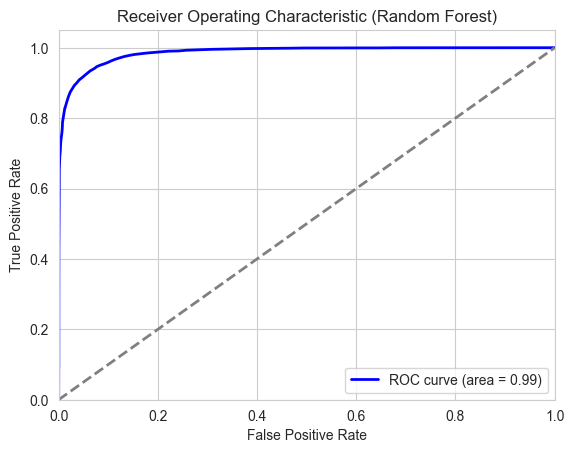

In [94]:
X = df_cleaned['text token']
y = df_cleaned['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Join the tokens back into strings
X_train = X_train.apply(lambda tokens: ' '.join(tokens))
X_test = X_test.apply(lambda tokens: ' '.join(tokens))

# Define a pipeline to transform the text data and then apply the classifier
pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

# Train Random Forest model
pipeline_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = pipeline_rf.predict(X_test)
y_prob_rf = pipeline_rf.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Generate classification report
class_report_rf = classification_report(y_test, y_pred_rf, target_names=['Fake', 'Real'])
print("Random Forest Classification Report:")
print(class_report_rf)

# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Calculate F1 score
f1_rf = f1_score(y_test, y_pred_rf)
print("Random Forest F1 Score:", f1_rf)

# Calculate ROC AUC score
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("Random Forest ROC AUC Score:", roc_auc_rf)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf:0.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc='lower right')
plt.show()

### Model comparison

In [59]:
# Get the scores for each model
score_lr = model_lr.score(X_test, y_test)
score_svm = pipeline_svm.score(X_test, y_test)
score_dt = pipeline_dt.score(X_test, y_test)
score_rf = pipeline_rf.score(X_test, y_test)

# Create a DataFrame to store model names and their scores
models = pd.DataFrame({
    "Models": ["Logistic Regression", "SVM", "Decision Tree", "Random Forest"],
    "Score": [score_lr, score_svm, score_dt, score_rf]
})

# Sort the DataFrame by Score in descending order
models = models.sort_values(by="Score", ascending=False)

/var/folders/5m/4lhv4ytx7yj3s466mgvgfz4c0000gn/T/ipykernel_72969/3720070163.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models['Models'], y=models['Score'], palette=colors)


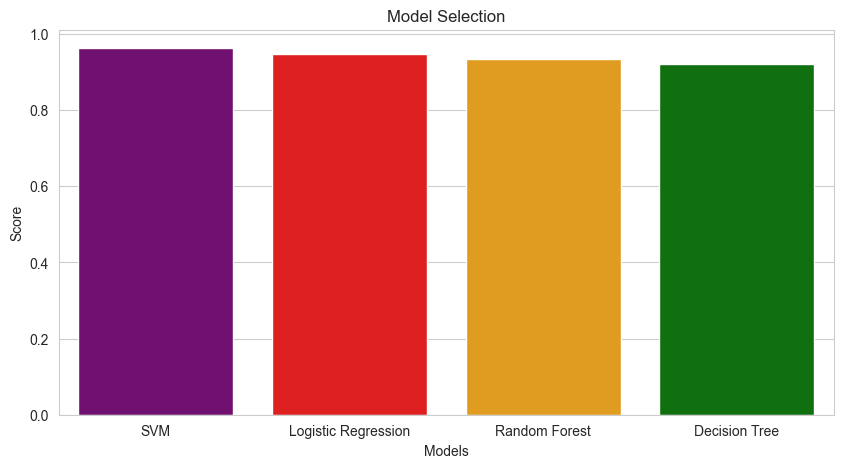

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors for the bars
colors = ['purple', 'red', 'orange', 'green']

# Set the style for the plot
sns.set_style('whitegrid')

# Plot the scores
plt.figure(figsize=(10, 5))
sns.barplot(x=models['Models'], y=models['Score'], palette=colors)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Selection")
plt.show()

RBF SVM Accuracy: 0.9640760413754543
RBF SVM Classification Report:
              precision    recall  f1-score   support

        Fake       0.97      0.95      0.96      6944
        Real       0.96      0.97      0.97      7364

    accuracy                           0.96     14308
   macro avg       0.96      0.96      0.96     14308
weighted avg       0.96      0.96      0.96     14308



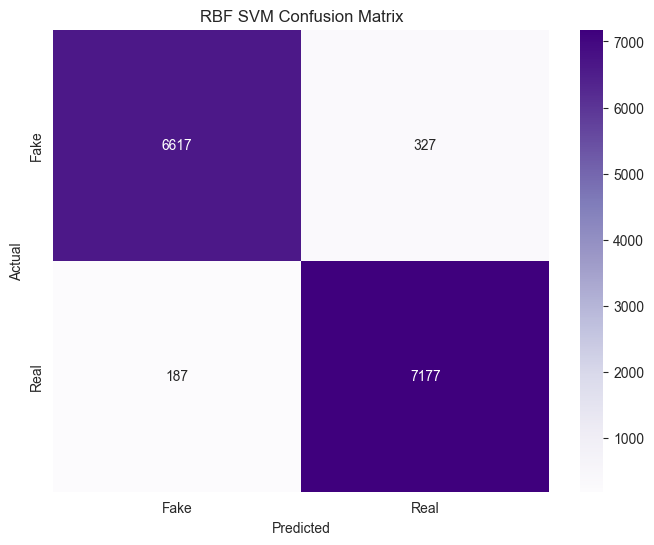

In [62]:
X = df_cleaned['text token']  
y = df_cleaned['label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

X_train = X_train.apply(lambda tokens: ' '.join(tokens))
X_test = X_test.apply(lambda tokens: ' '.join(tokens))

pipeline_rbf_svc = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='rbf'))
])

pipeline_rbf_svc.fit(X_train, y_train)

# Predict on the test set
y_pred_rbf_svc = pipeline_rbf_svc.predict(X_test)

# Evaluate the model
accuracy_rbf_svc = accuracy_score(y_test, y_pred_rbf_svc)
print("RBF SVM Accuracy:", accuracy_rbf_svc)

# Generate classification report
class_report_rbf_svc = classification_report(y_test, y_pred_rbf_svc, target_names=['Fake', 'Real'])
print("RBF SVM Classification Report:")
print(class_report_rbf_svc)

# Calculate confusion matrix
conf_matrix_rbf_svc = confusion_matrix(y_test, y_pred_rbf_svc)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rbf_svc, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RBF SVM Confusion Matrix')
plt.show()

Polynomial SVM Accuracy: 0.9131954151523624
Polynomial SVM Classification Report:
              precision    recall  f1-score   support

        Fake       0.96      0.86      0.91      6944
        Real       0.88      0.97      0.92      7364

    accuracy                           0.91     14308
   macro avg       0.92      0.91      0.91     14308
weighted avg       0.92      0.91      0.91     14308



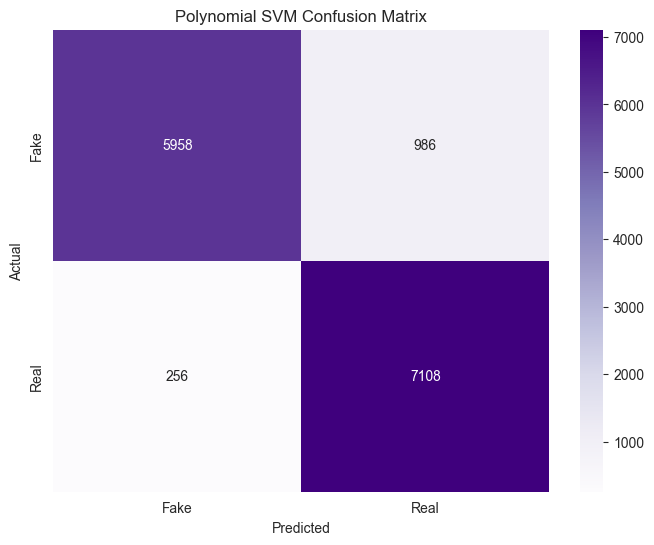

In [63]:
X = df_cleaned['text token']  
y = df_cleaned['label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

X_train = X_train.apply(lambda tokens: ' '.join(tokens))
X_test = X_test.apply(lambda tokens: ' '.join(tokens))

pipeline_poly_svc = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='poly', degree=3))  # Degree can be adjusted
])

pipeline_poly_svc.fit(X_train, y_train)

# Predict on the test set
y_pred_poly_svc = pipeline_poly_svc.predict(X_test)

# Evaluate the model
accuracy_poly_svc = accuracy_score(y_test, y_pred_poly_svc)
print("Polynomial SVM Accuracy:", accuracy_poly_svc)

# Generate classification report
class_report_poly_svc = classification_report(y_test, y_pred_poly_svc, target_names=['Fake', 'Real'])
print("Polynomial SVM Classification Report:")
print(class_report_poly_svc)

# Calculate confusion matrix
conf_matrix_poly_svc = confusion_matrix(y_test, y_pred_poly_svc)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_poly_svc, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Polynomial SVM Confusion Matrix')
plt.show()

/opt/anaconda3/envs/notebook/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVM Accuracy: 0.9651244059267543
Linear SVM Classification Report:
              precision    recall  f1-score   support

        Fake       0.97      0.96      0.96      6944
        Real       0.96      0.97      0.97      7364

    accuracy                           0.97     14308
   macro avg       0.97      0.96      0.97     14308
weighted avg       0.97      0.97      0.97     14308



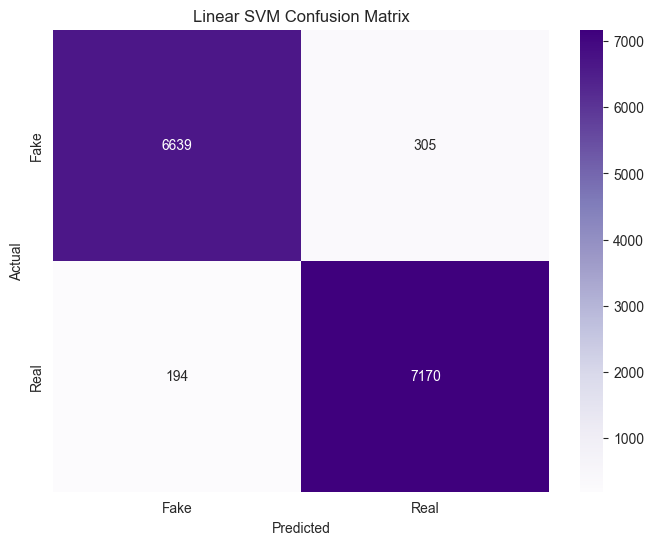

In [66]:
X = df_cleaned['text token']
y = df_cleaned['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Join the tokens back into strings
X_train = X_train.apply(lambda tokens: ' '.join(tokens))
X_test = X_test.apply(lambda tokens: ' '.join(tokens))

# Define a pipeline to transform the text data and then apply the Linear SVM classifier
pipeline_linear_svc = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC(max_iter=10000))  # Explicitly setting max_iter for convergence
])

# Train Linear SVM model
pipeline_linear_svc.fit(X_train, y_train)

# Predict on the test set
y_pred_linear_svc = pipeline_linear_svc.predict(X_test)

# Evaluate the Linear SVM model
accuracy_linear_svc = accuracy_score(y_test, y_pred_linear_svc)
print("Linear SVM Accuracy:", accuracy_linear_svc)

# Generate classification report
class_report_linear_svc = classification_report(y_test, y_pred_linear_svc, target_names=['Fake', 'Real'])
print("Linear SVM Classification Report:")
print(class_report_linear_svc)

# Calculate confusion matrix
conf_matrix_linear_svc = confusion_matrix(y_test, y_pred_linear_svc)

# Plot confusion matrix for Linear SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_linear_svc, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Linear SVM Confusion Matrix')
plt.show()

In [80]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

X = df_cleaned['text token']
y = df_cleaned['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Join the tokens back into strings
X_train = X_train.apply(lambda tokens: ' '.join(tokens))
X_test = X_test.apply(lambda tokens: ' '.join(tokens))

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# Initialize GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)

# Fit to training data
grid.fit(X_train_tfidf, y_train)

# Best parameters
print("Best parameters found: ", grid.best_params_)

# Evaluate on test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=43.7min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.909 total time=43.9min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=43.8min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=74.9min


KeyboardInterrupt: 

# Hyperparameter Tuning, Computational Limitations, and Results 
As redears can see above, our attempts to fit the SVM model using 5-fold cross-validation for each of the 25 candidates required a substantial amount of computational resources:


<div class="alert alert-block alert-warning">
Fitting 5 folds for each of 25 candidates, totalling 125 fits<br>
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=43.7min<br>
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.909 total time=43.9min<br>
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=43.8min<br>
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=74.9min
</div>

Due to the insufficient computational power of our laptop, it is impractical for us to exhaustively explore all combinations of our hyperparameter grid:

```python
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}
```

However, the results from the configuration we did manage to test **𝐶 = 0.1, 𝛾 = 1, and kernel = 'rbf'** are quite promising, with scores consistently above 90% in accuracy. Specifically, we observed:

* **Cross-validation scores ranged from 0.905 to 0.913.**
* **An average score of approximately 0.909.**

These findings suggest that even with regularization applied, the SVM model can perform very well, achieving an accuracy above 90%. This gives us confidence that, with more comprehensive hyperparameter tuning and greater computational resources, we could further optimize the model and potentially enhance its performance even more.

# Communication

* **Logistic Regression:** Being a linear model, Logistic Regression is less capable of capturing non-linear patterns
* **Decision Tree:** Decision Trees can handle non-linear relationships but are prone to overfitting, especially with noisy or high-dimensional data
* **Random Forest:** While Random Forests, as an ensemble method, mitigate some of the overfitting issues of single Decision Trees and can handle non-linearities to an extent, they might still not capture the complex relationships as efficiently as SVM with RBF kernel in high-dimensional feature spaces.

As our assumption aforementioned, the relationship between the words (features) and the news labels (fake or real) is likely to be non-linear. The performance of our SVM model supports this assumption, indicating that logistic regression is not the most effective method for capturing this relationship. 

Additionally, the SVM with the RBF kernel has proven to be particularly efficient in dealing with high-dimensional data. It can find optimal decision boundaries in these complex spaces more effectively than other algorithms. This is because the RBF kernel maps inputs into higher dimensions, allowing it to capture the intricate patterns and relationships within the data.

In summary, the non-linear nature of the relationship between the features (words) and the labels (news being fake or real), combined with the high dimensionality of text data, makes the SVM with the RBF kernel a more suitable and effective choice for this classification task. The RBF kernel's ability to map inputs into higher dimensions and find optimal separating hyperplanes results in better performance compared to linear models, Decision Trees, and even Random Forests in this context.

# Future work
For future work, I am interested in exploring the integration of sentiment analysis and topic modeling to further enhance the fake news detection model and gain deeper insights into the nature of fake news.

Combining Sentiment and Topic Analysis:

* **Objective:** Integrate `sentiment analysis` and `BERTopic` to gain a comprehensive understanding of how fake news affects public sentiment and opinion.
* **Hypothesis:** Fake news articles are not only more negative in sentiment but also strategically focused on topics that polarize public opinion and incite negative feelings towards certain individuals or organizations.
* **Approach:** Combine the results of sentiment analysis and topic modeling to analyze the interplay between sentiment and the topics covered in fake news. This combined analysis will provide insights into the strategies used in fake news to manipulate public opinion and create division.

By pursuing these future directions, the goal is to enhance the fake news detection model and provide a more nuanced understanding of the content and impact of fake news. This comprehensive approach will help in developing more effective strategies to combat misinformation and its negative effects on society.